# Chapter 7 : CNN

convolutional neural network - 이미지 인식과 음성 인식 등등

Affine 계층만 있었던 neural network에서 

힙성곱 계층 (convolution kayer), 폴링 계층 (pooling layer) 계층도 추가됨.

(Conv - ReLU - Pooling)   or   (Conv - ReLU) 로 구성되며 Poling은 생략가능


## 합성곱 계층 사용이유

완전 연결 계층의 문제점이 뭘까? 바로 데이터의 형상이 무너진다는 것이다.

RGB데이터 값을 생각해보면 R - G의 관계 G - B, B - R 관계가 긴밀히 존재할 것이다.

하지만 Affine 계층은 이 관계를 무시하고 1차원데이터로 평탄화한 후 파라미터 학습을 시작한다.

이 과정에서 형상을 무시하고 본질적인 패턴을 무시할 수도 있다. 그렇기에 합성곱 계층을 사용한다

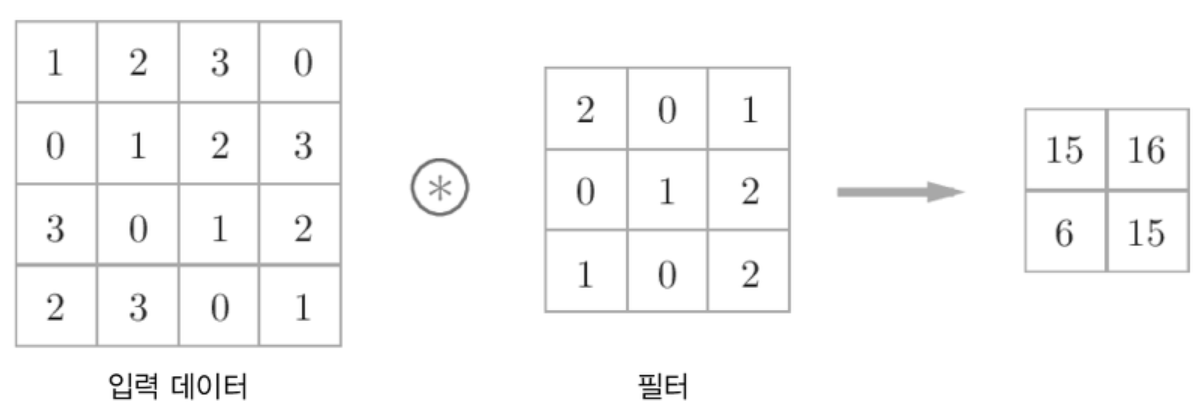 

다음과 같이 사용되는 것이 합성곱 계층이다.

편향은 1 * 1 데이터로 모든 노드에 값을 더하는 식으로 편향을 적용할 수 있다. 

## 패딩

위 사진을 보면 필터를 적용하면서 최외각 원소들을 중심으로 하는 합성곱은 만들어 낼 수 없다.

그렇기에 주위 데이터를 0으로 채워서 최외각 원소들을 중심으로 하는 합성곱을 만들어내기 위해 사용한다

## 스트라이드

한번 진행할 때 움직일 거리를 정함

입력크기 = (H, W), 필터크기 = (FH, FW), 패딩 = P, 스트라이드 = S라고 하면

$OH  = (H + 2P - FH) / S + 1$

$OW  = (W + 2P - FW) / S + 1$

를 만족한다.

## 3차원 데이터에서 합성곱 연산

2차원 데이터가 n개의 채널이 있는 것으로 취급하여 계산을 진행한다.

n번 합성곱 연산이 끝나면 모든 결과를 더해 하나의 2차원 데이터로 출력을 얻는다.

필터를 여러개 사용한다면, 필터의 수만큼 2차원 데이터를 얻게 된다.

## 풀링

세로 가로 방향의 공간을 줄이기 하는 연산으로 

2 * 2 max pooling 을 하면 2 * 2 데이터로 만들고, 3 * 3 max pooling을 하면 3 * 3 데이터로 만든다.

해당 영역에서 가장 큰 원소를 꺼내면서 진행한다.

In [2]:
import numpy as np
x = np.random.rand(10, 1, 28, 28)
x.shape

(10, 1, 28, 28)

In [4]:
x[0].shape
x[1].shape

(1, 28, 28)

In [6]:
x[0, 0]

array([[6.37631103e-01, 7.84196863e-01, 6.41192508e-01, 6.30196860e-01,
        5.60566529e-01, 3.49968958e-01, 3.02601717e-01, 4.24416081e-01,
        2.08999672e-01, 6.89930457e-01, 7.11222161e-01, 9.24366029e-01,
        1.15940897e-01, 4.45130848e-01, 5.69259164e-01, 8.86534934e-01,
        2.15521781e-02, 1.53699726e-01, 3.98866793e-01, 9.17438514e-01,
        4.75878256e-01, 9.79325651e-02, 2.89461978e-01, 9.27716647e-01,
        6.25340110e-01, 2.62080054e-01, 6.96247810e-01, 5.15690779e-01],
       [8.98066163e-01, 8.49554206e-01, 3.60339947e-01, 5.73711474e-01,
        8.89939918e-01, 1.33477756e-01, 6.65198482e-01, 7.21370676e-01,
        8.07140605e-01, 5.95380915e-01, 6.85778575e-01, 1.24988586e-01,
        4.99262142e-01, 6.29980675e-01, 3.08899524e-01, 7.51701717e-01,
        3.57850454e-01, 2.81945800e-01, 7.56057625e-01, 7.41287715e-01,
        7.32274181e-01, 2.66470632e-01, 8.23214246e-01, 7.95538318e-01,
        1.17479305e-01, 3.32771769e-01, 5.40701353e-01, 4.70343

In [11]:
import sys, os
sys.path.append(os.pardir)
from common.util import im2col

x1 = np.random.rand(1,3,7,7)
col = im2col(x1, 5, 5)
print(col)
col.shape

[[0.61992643 0.53321989 0.76602807 0.76203009 0.04751251 0.36426722
  0.27356002 0.22007936 0.54149747 0.83602386 0.74112565 0.88680174
  0.24878941 0.50304847 0.53908405 0.13254379 0.50304754 0.34051057
  0.22724382 0.33824966 0.53915322 0.83928006 0.23794942 0.81439034
  0.92239294 0.1427665  0.84402586 0.79133263 0.0880469  0.3719599
  0.9459152  0.60745699 0.78402305 0.89999631 0.68018083 0.65924745
  0.43079146 0.72910629 0.03090122 0.26967551 0.20547944 0.14961909
  0.90274454 0.58588346 0.47987808 0.92542983 0.38051341 0.36767249
  0.80224937 0.49616194 0.71229124 0.7372941  0.54865363 0.37214728
  0.83617595 0.27797287 0.10470664 0.97086301 0.54161983 0.48060056
  0.20263726 0.70720566 0.2176954  0.37384666 0.36678395 0.65056237
  0.25190377 0.87534732 0.01015488 0.35786977 0.46662114 0.67097032
  0.86163864 0.4963537  0.71446527]
 [0.53321989 0.76602807 0.76203009 0.04751251 0.79519325 0.27356002
  0.22007936 0.54149747 0.83602386 0.12848827 0.88680174 0.24878941
  0.50304847 

(9, 75)

In [4]:
a = np.arange(9).reshape(3,3)
a[:,:2]

array([[0, 1],
       [3, 4],
       [6, 7]])

In [3]:
import sys, os
import numpy as np
sys.path.append(os.pardir)
from common.util import im2col

x = np.arange(16).reshape(1,1,4,4)
print(x)
col = im2col(x, 3, 3)
print(col)

[[[[ 0  1  2  3]
   [ 4  5  6  7]
   [ 8  9 10 11]
   [12 13 14 15]]]]
[[ 0.  1.  2.  4.  5.  6.  8.  9. 10.]
 [ 1.  2.  3.  5.  6.  7.  9. 10. 11.]
 [ 4.  5.  6.  8.  9. 10. 12. 13. 14.]
 [ 5.  6.  7.  9. 10. 11. 13. 14. 15.]]


In [1]:
class Convolution:
    def __init__(self, W, b, stride = 1, pad = 0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad 
    
    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1 + (H + 2 * self.pad - FH) // self.stride)
        out_w = int(1 + (W + 2 * self.pad - FW) // self.stride)

        col = im2col(x, FH, FW, self.stride , self.pad)
        col_W = self.W.reshape(FN, -1).T
        out = np.dot(col, col_W) + self.b

        out = out.reshape(N, out_h, out_w, -1).transpose(0,3,1,2)
        return out
    